## Importando as bibliotecas

In [251]:
# Bibliotecas para manipular os dados
import pandas as pd
import numpy as np

# Bibliotecas para fazer o RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Bibliotecas para Hyperparameter tuning e visualizar a performance
from sklearn.metrics import confusion_matrix, precision_score, ConfusionMatrixDisplay

# Bibliotecas para ver o modelo gerado
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Recebendo o dataset

Armazenando o dataset e retirando o atributo identificador, que não será usado

In [228]:
data = pd.read_csv('Cancer_Data.csv')

# Pegando apenas os valores dos dados
values = data.drop('id', axis=1).drop('diagnosis', axis=1).drop('Unnamed: 32', axis=1)

# Pegando as labels dos dados
labels = data['diagnosis']

In [229]:
values.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [230]:
labels.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

Normalizando o dataset

In [231]:
#Normalizando os valores antes de realizar o treino
values = (values - np.mean(values, axis=0)) / np.std(values, axis=0)

values.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

Separando os dados em trainamento e testes

In [232]:
values_train, values_test, labels_train, labels_test = train_test_split(values, labels, test_size=0.2, random_state=42)

## Hyperparameter Tuning

Escolhendo os melhores parâmetros para o random forest

In [233]:
n_estimators = range(10,100)
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']


best = [[0]]

for feature in max_features:
    for crit in criterion:
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, criterion=crit, max_features=feature)
            rf.fit(values_train, labels_train)

            acc = np.mean(cross_val_score(rf, values_train, labels_train, cv=10))
            
            if acc > best[len(best) - 1][0] or len(best) < 5:
                best.append([acc, [feature, crit, n], rf])
                
                best.sort(key=lambda elem: elem[0], reverse=True)
                
                if len(best) > 5:
                    best.pop()


In [234]:
for touple in best:
    print(touple)

[0.9779710144927536, ['sqrt', 'entropy', 13], RandomForestClassifier(criterion='entropy', n_estimators=13)]
[0.9757971014492753, ['sqrt', 'log_loss', 40], RandomForestClassifier(criterion='log_loss', n_estimators=40)]
[0.973623188405797, ['sqrt', 'log_loss', 93], RandomForestClassifier(criterion='log_loss', n_estimators=93)]
[0.9735265700483092, ['log2', 'log_loss', 44], RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=44)]
[0.9714492753623188, ['sqrt', 'gini', 89], RandomForestClassifier(n_estimators=89)]


## Avaliando a performance dos modelos com outras métricas de avaliação

Aqui usaremos a matriz de confusão, precisão e o cross validation o desempenho dos 5 modelos acima para decidir qual o melhor.

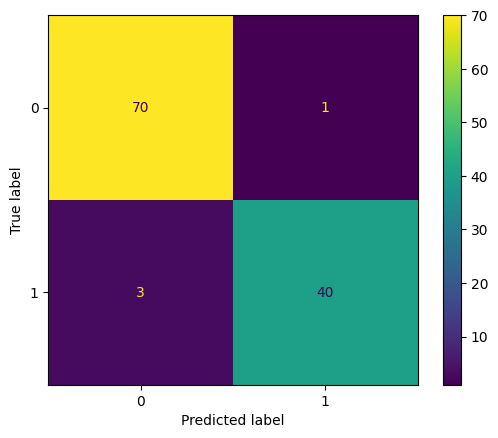

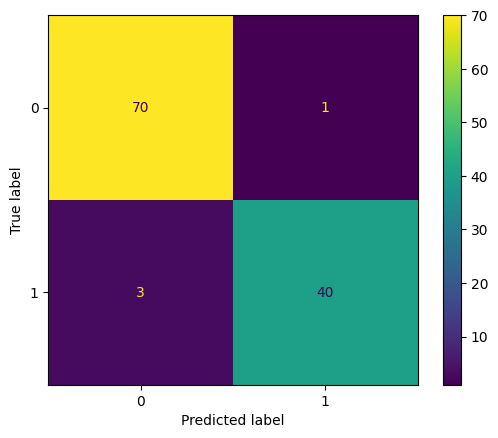

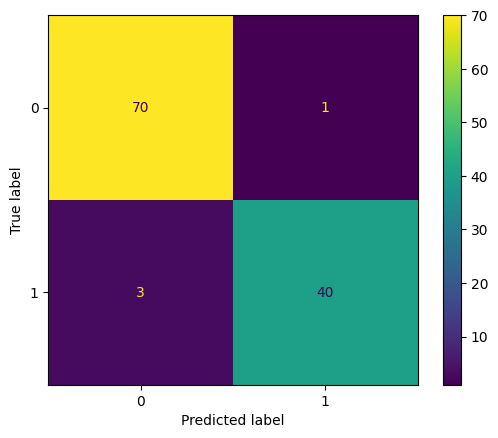

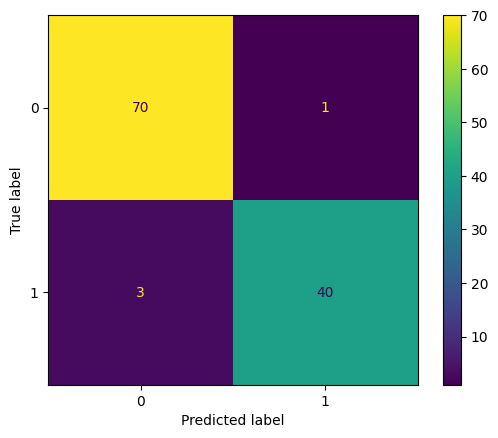

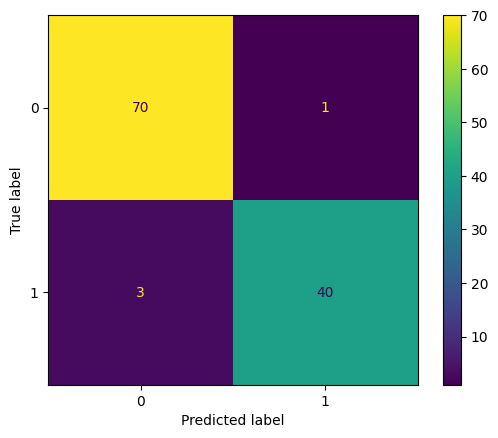

In [236]:
cvs = []
prs = []

for i, touple in enumerate(best):
    model: RandomForestClassifier = touple[2]
    cvs.append(touple[0])
    
    labels_pred = model.predict(values_test)
    
    cm = confusion_matrix(labels_test, labels_pred)
    prs.append(precision_score(labels_test, labels_pred, pos_label='B'))
    
    ConfusionMatrixDisplay(cm).plot()

In [248]:
for i in range(5):
    print(f'Modelo {i}: ')
    print(f'Precisão: {prs[i]}')
    print(f'Média da cross-validation: {cvs[i]}')

Modelo 0: 
Precisão: 0.958904109589041
Média da cross-validation: 0.9779710144927536
Modelo 1: 
Precisão: 0.958904109589041
Média da cross-validation: 0.9757971014492753
Modelo 2: 
Precisão: 0.958904109589041
Média da cross-validation: 0.973623188405797
Modelo 3: 
Precisão: 0.958904109589041
Média da cross-validation: 0.9735265700483092
Modelo 4: 
Precisão: 0.958904109589041
Média da cross-validation: 0.9714492753623188


Portanto, nota-se, como a precisão é igual para os 5 modelos e a maior média do cross-validation é a do primeiro modelo, cujos parâmetros são ['sqrt', 'entropy', 13], então iremos escolher esse modelo como o resultado, apesar de que também poderiamos escolher os outros, visto que a diferença no cross-validation é minúscula.

## Resultado

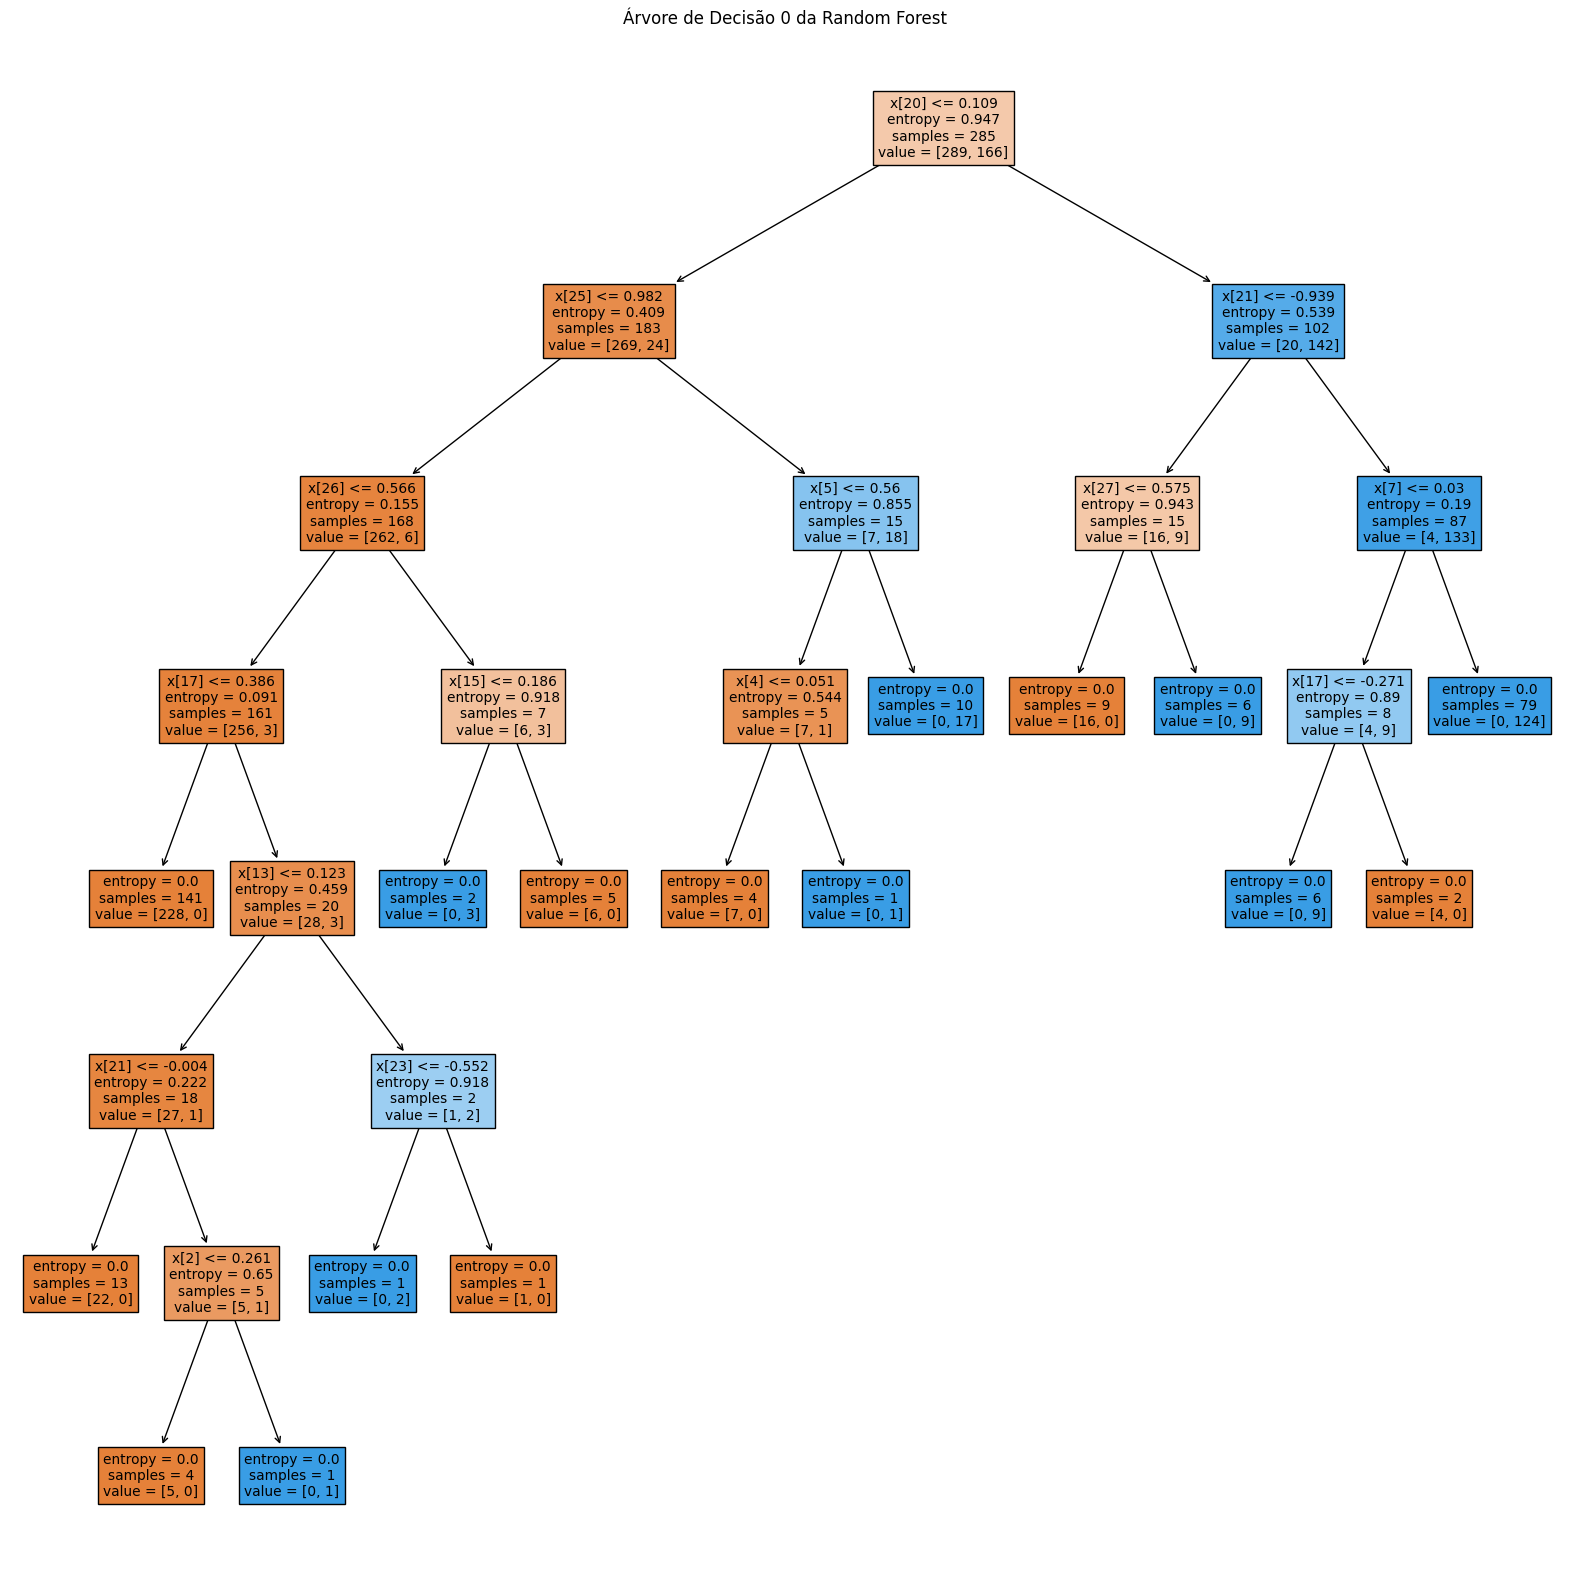

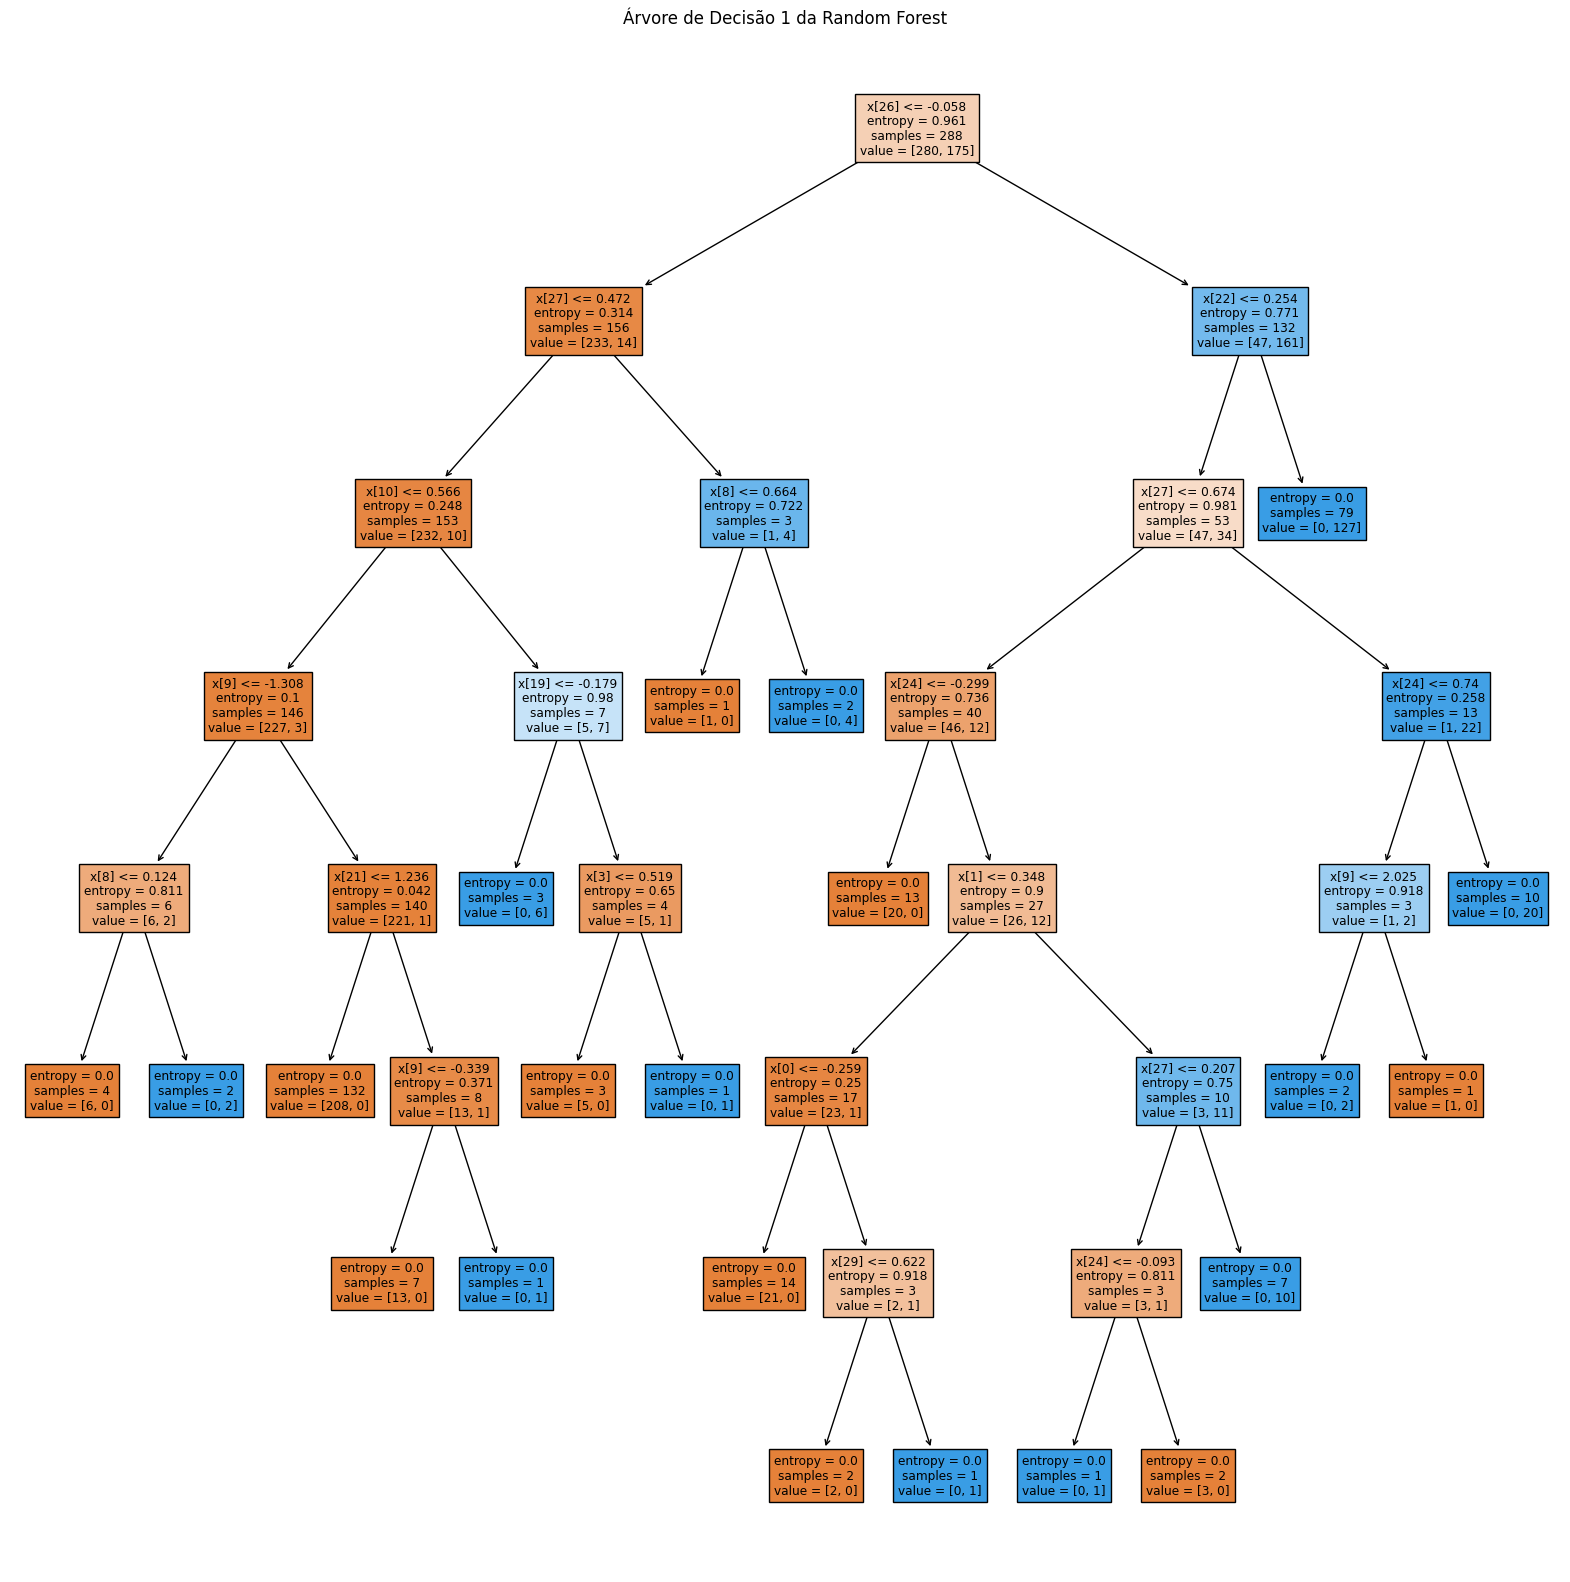

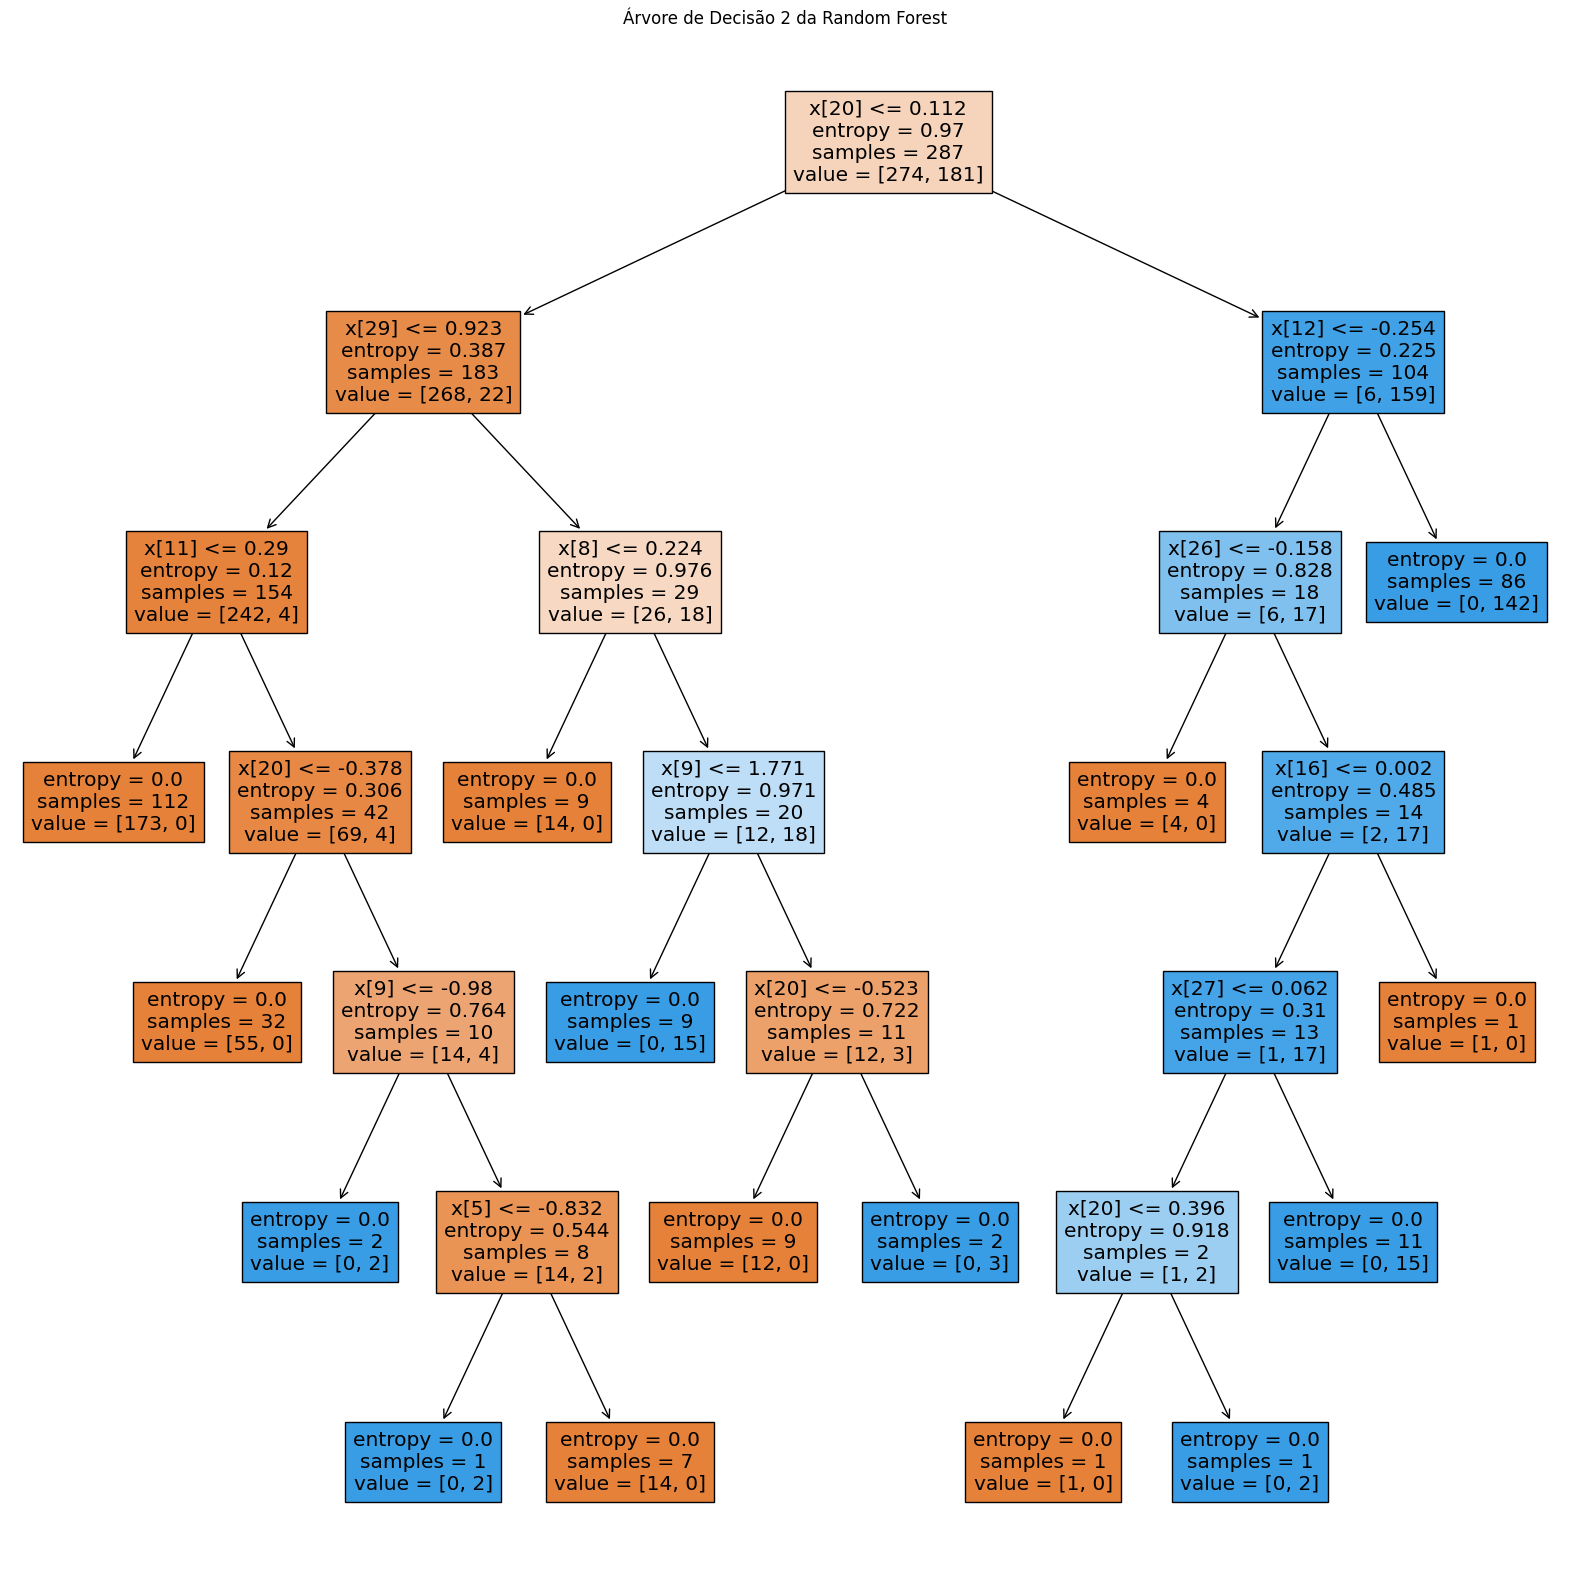

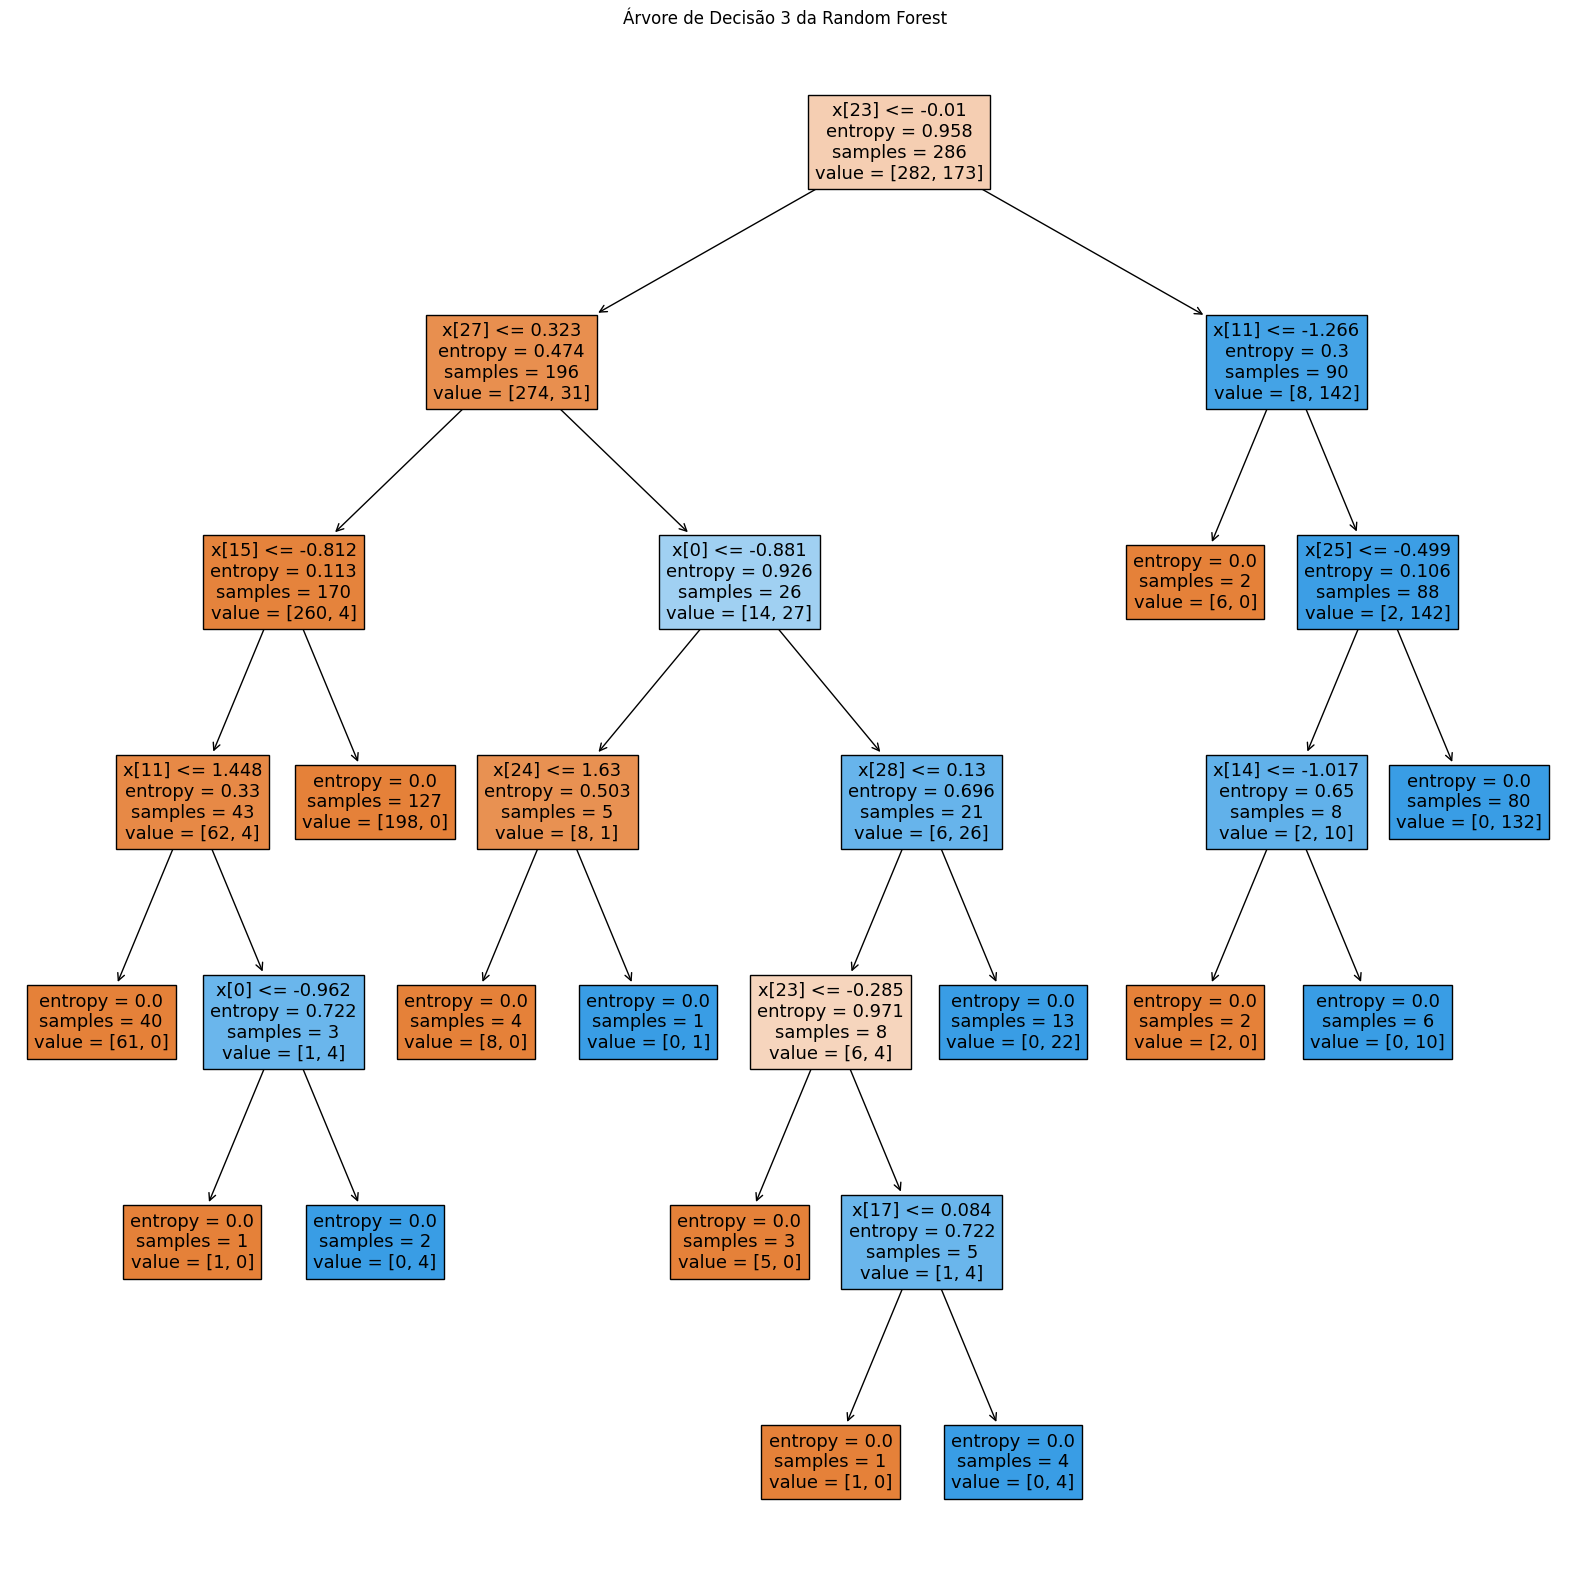

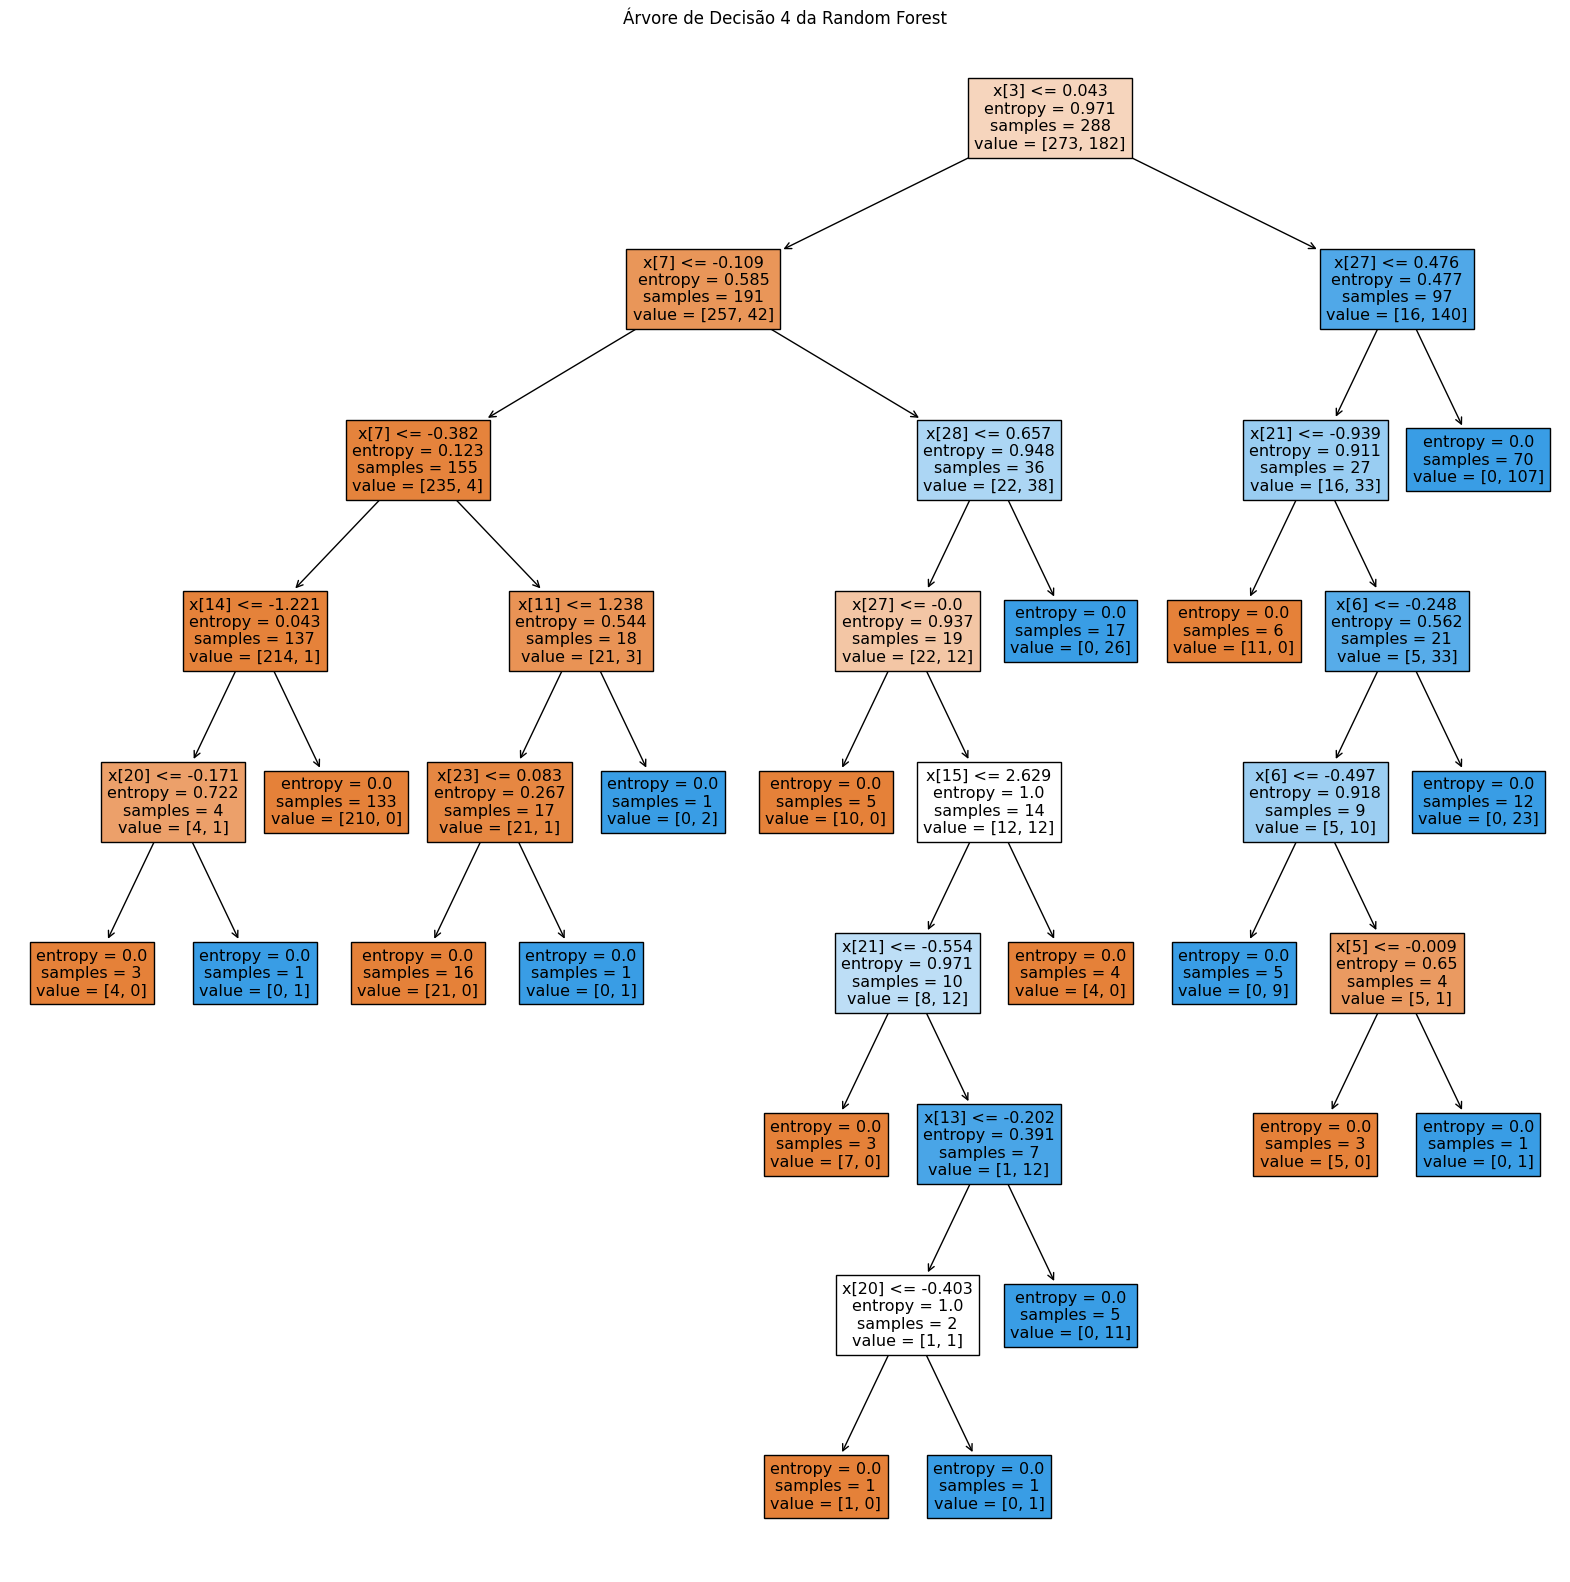

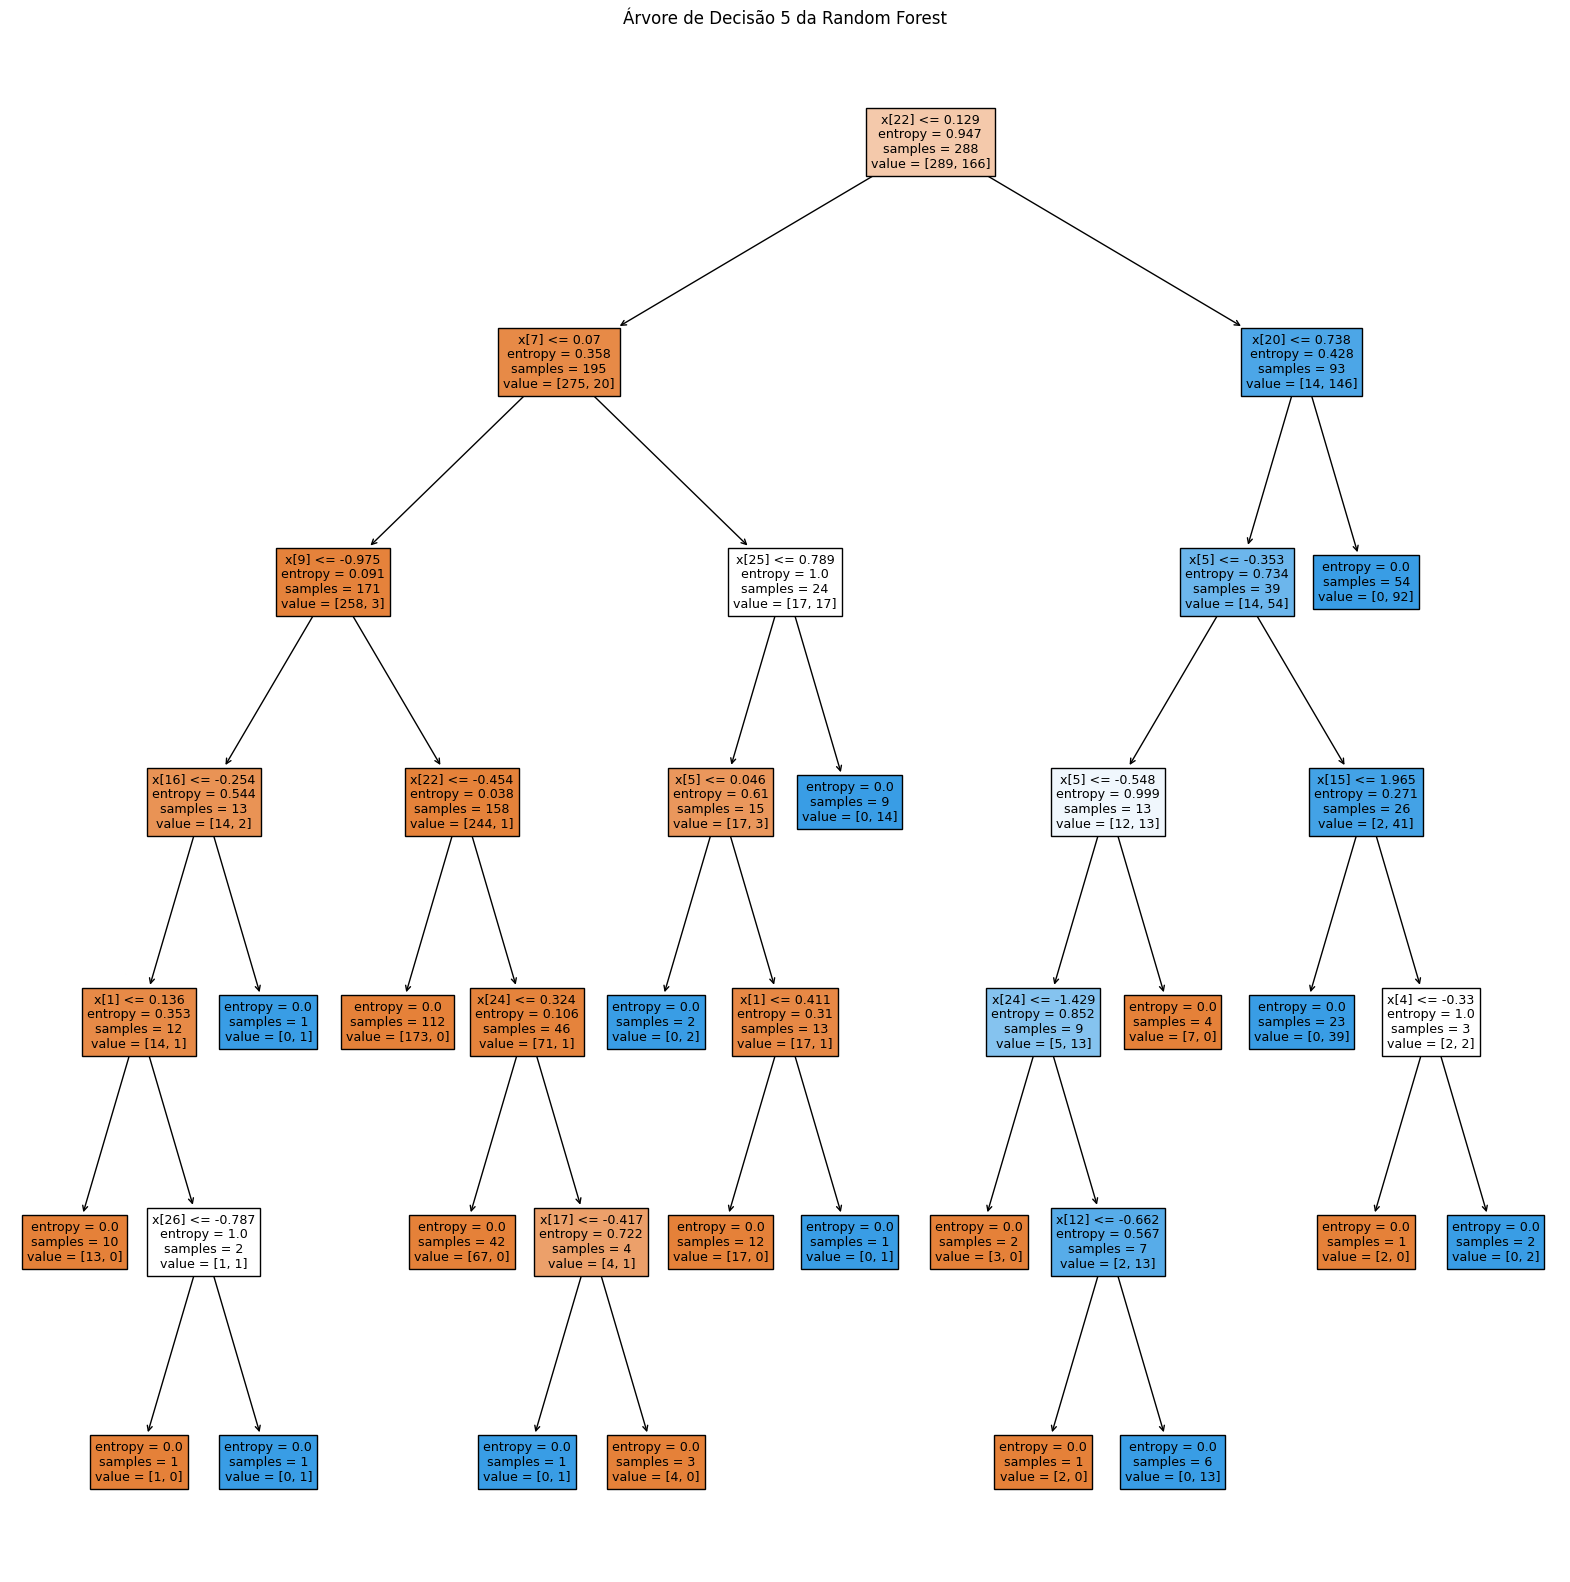

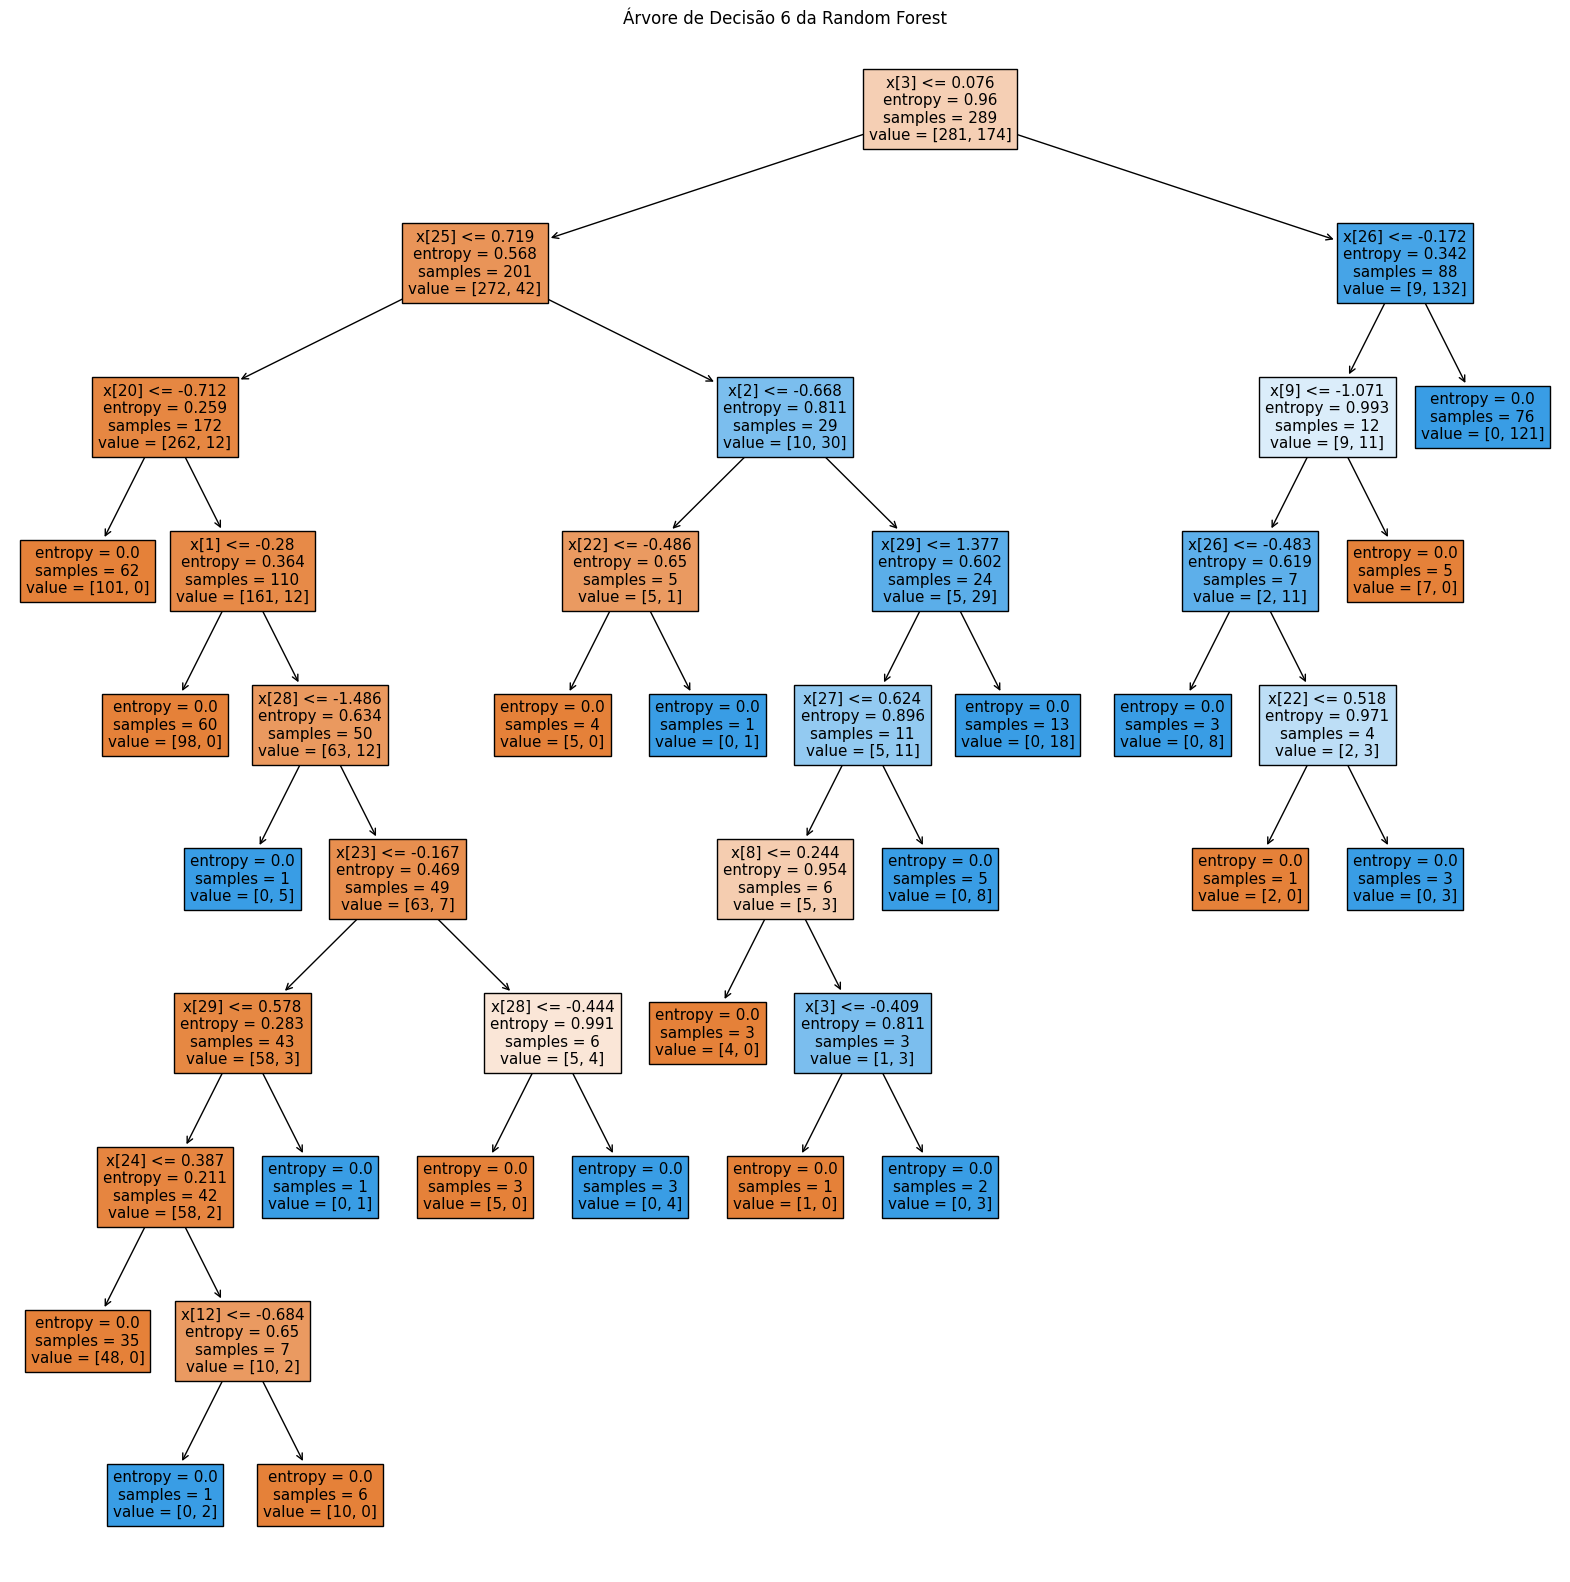

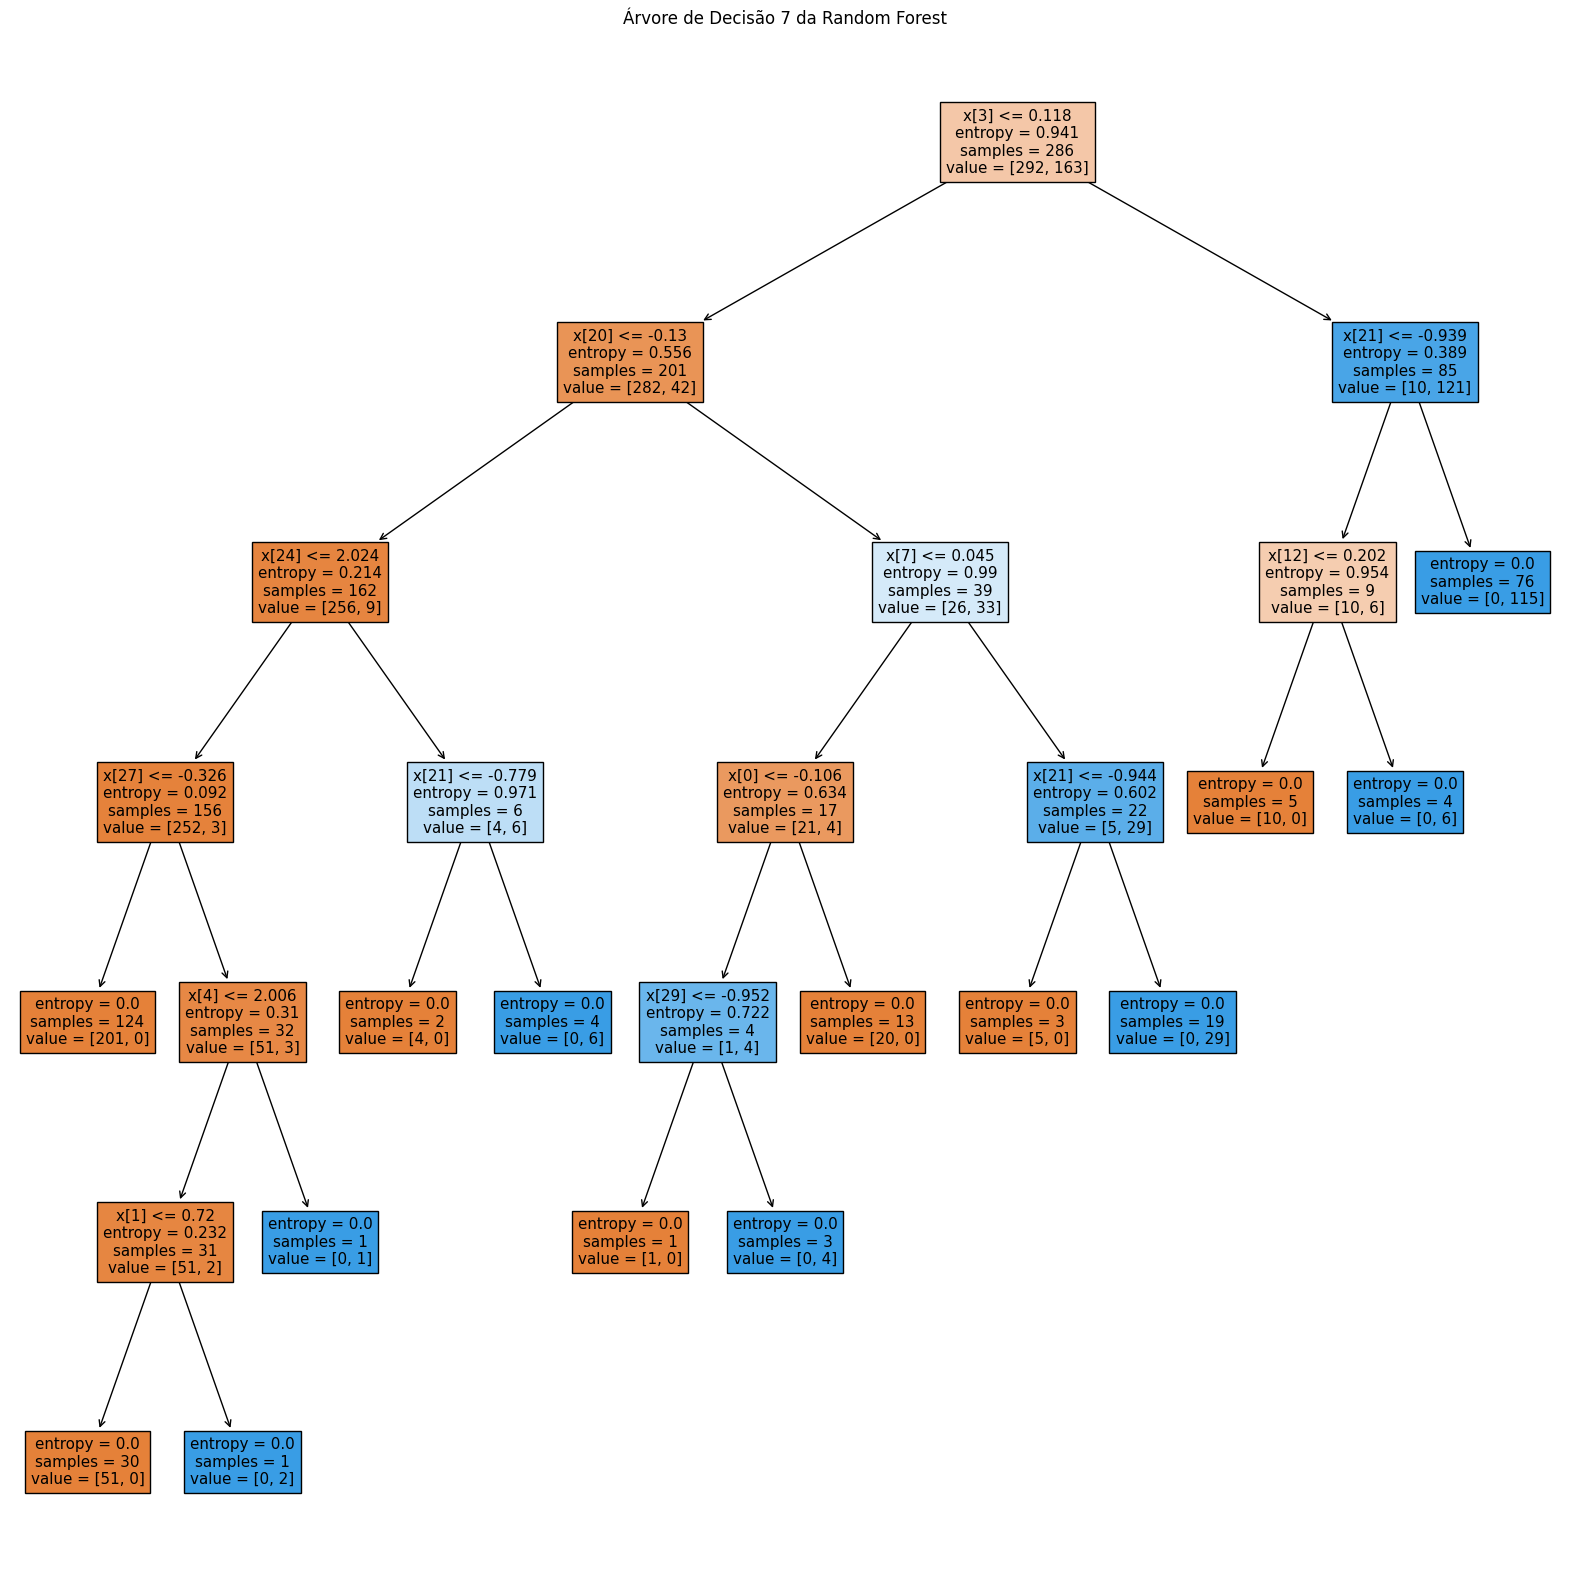

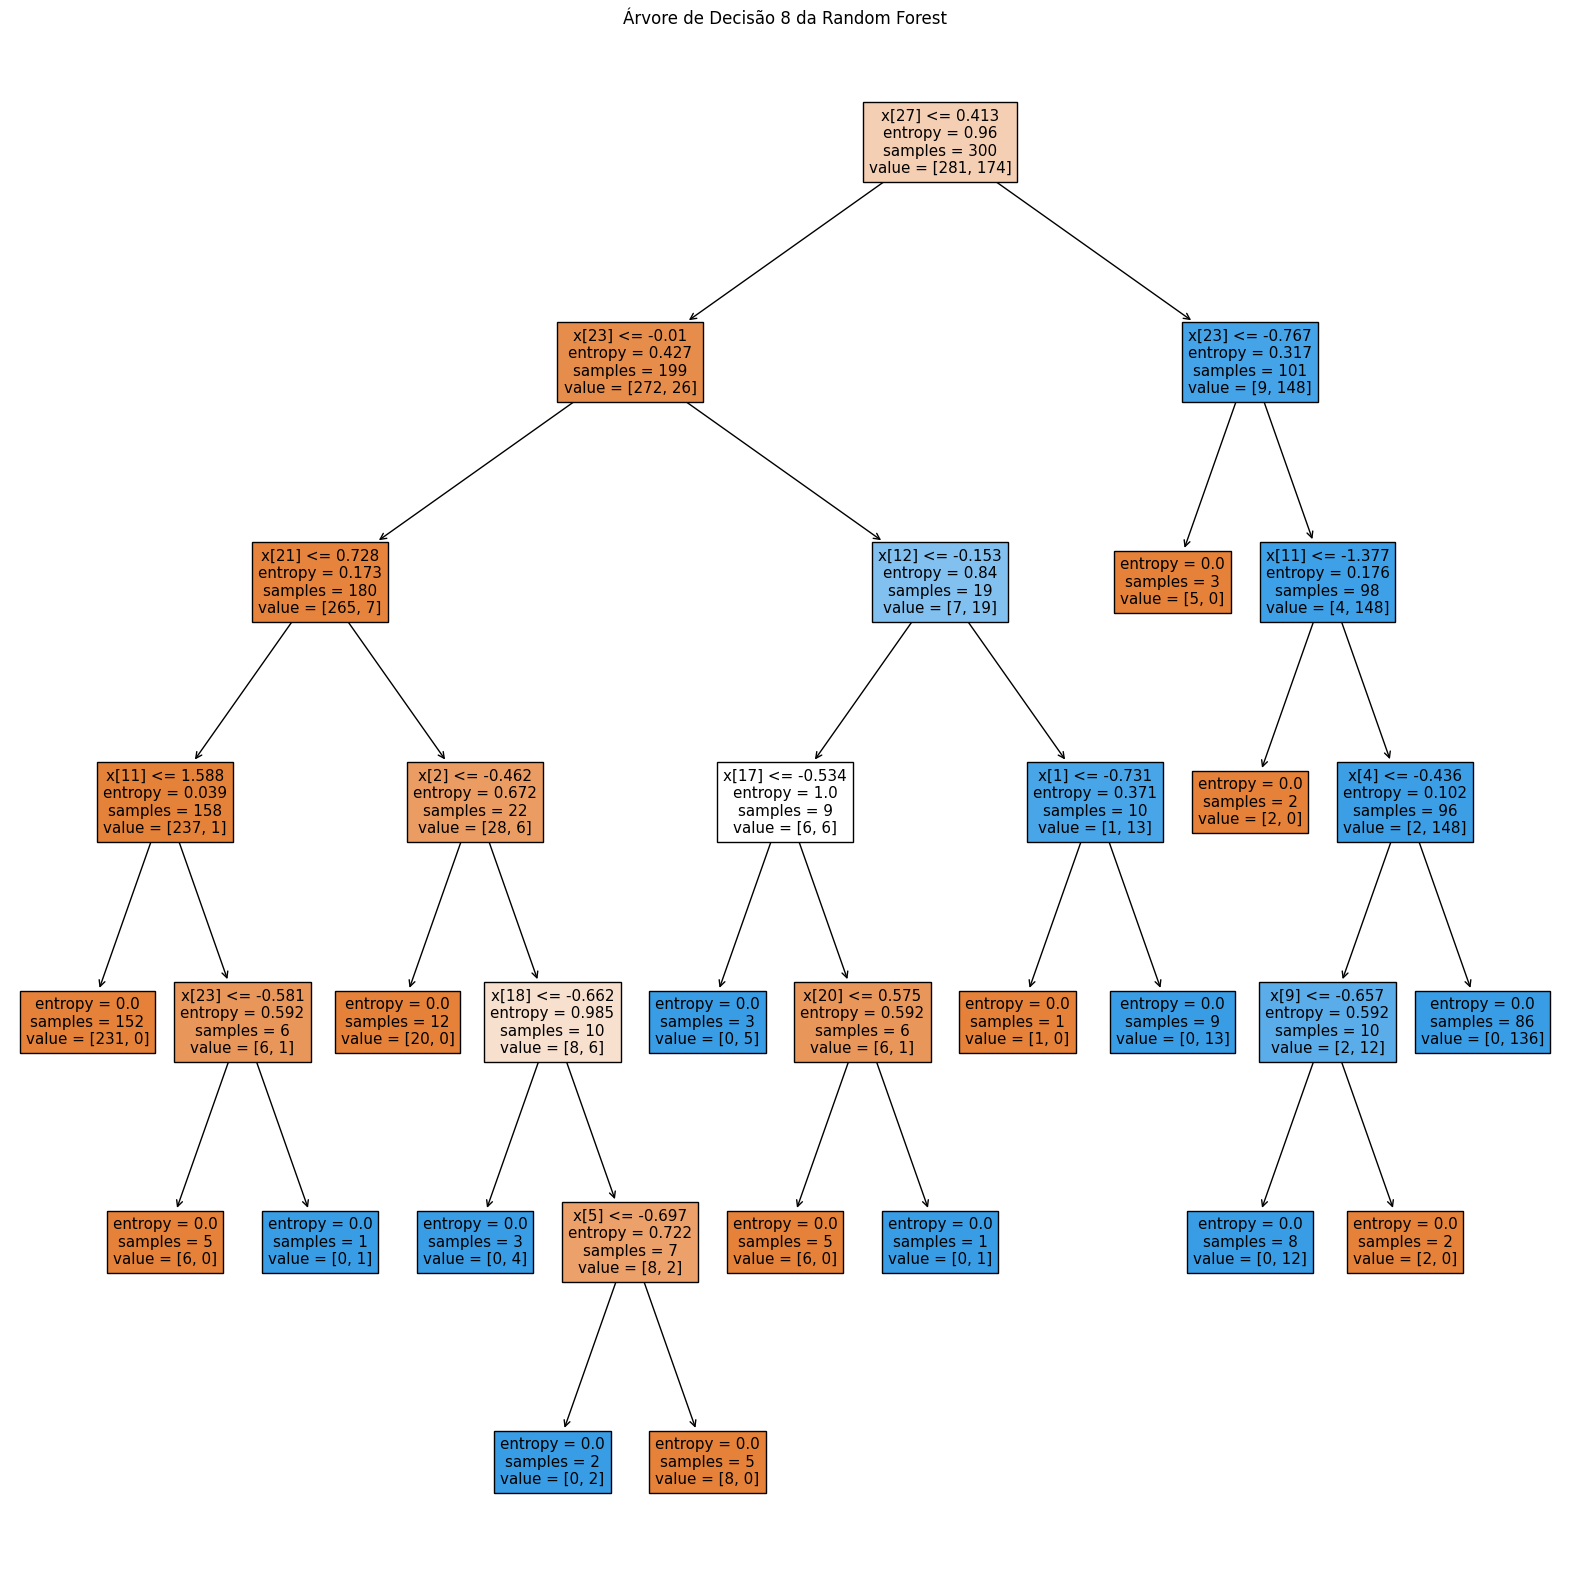

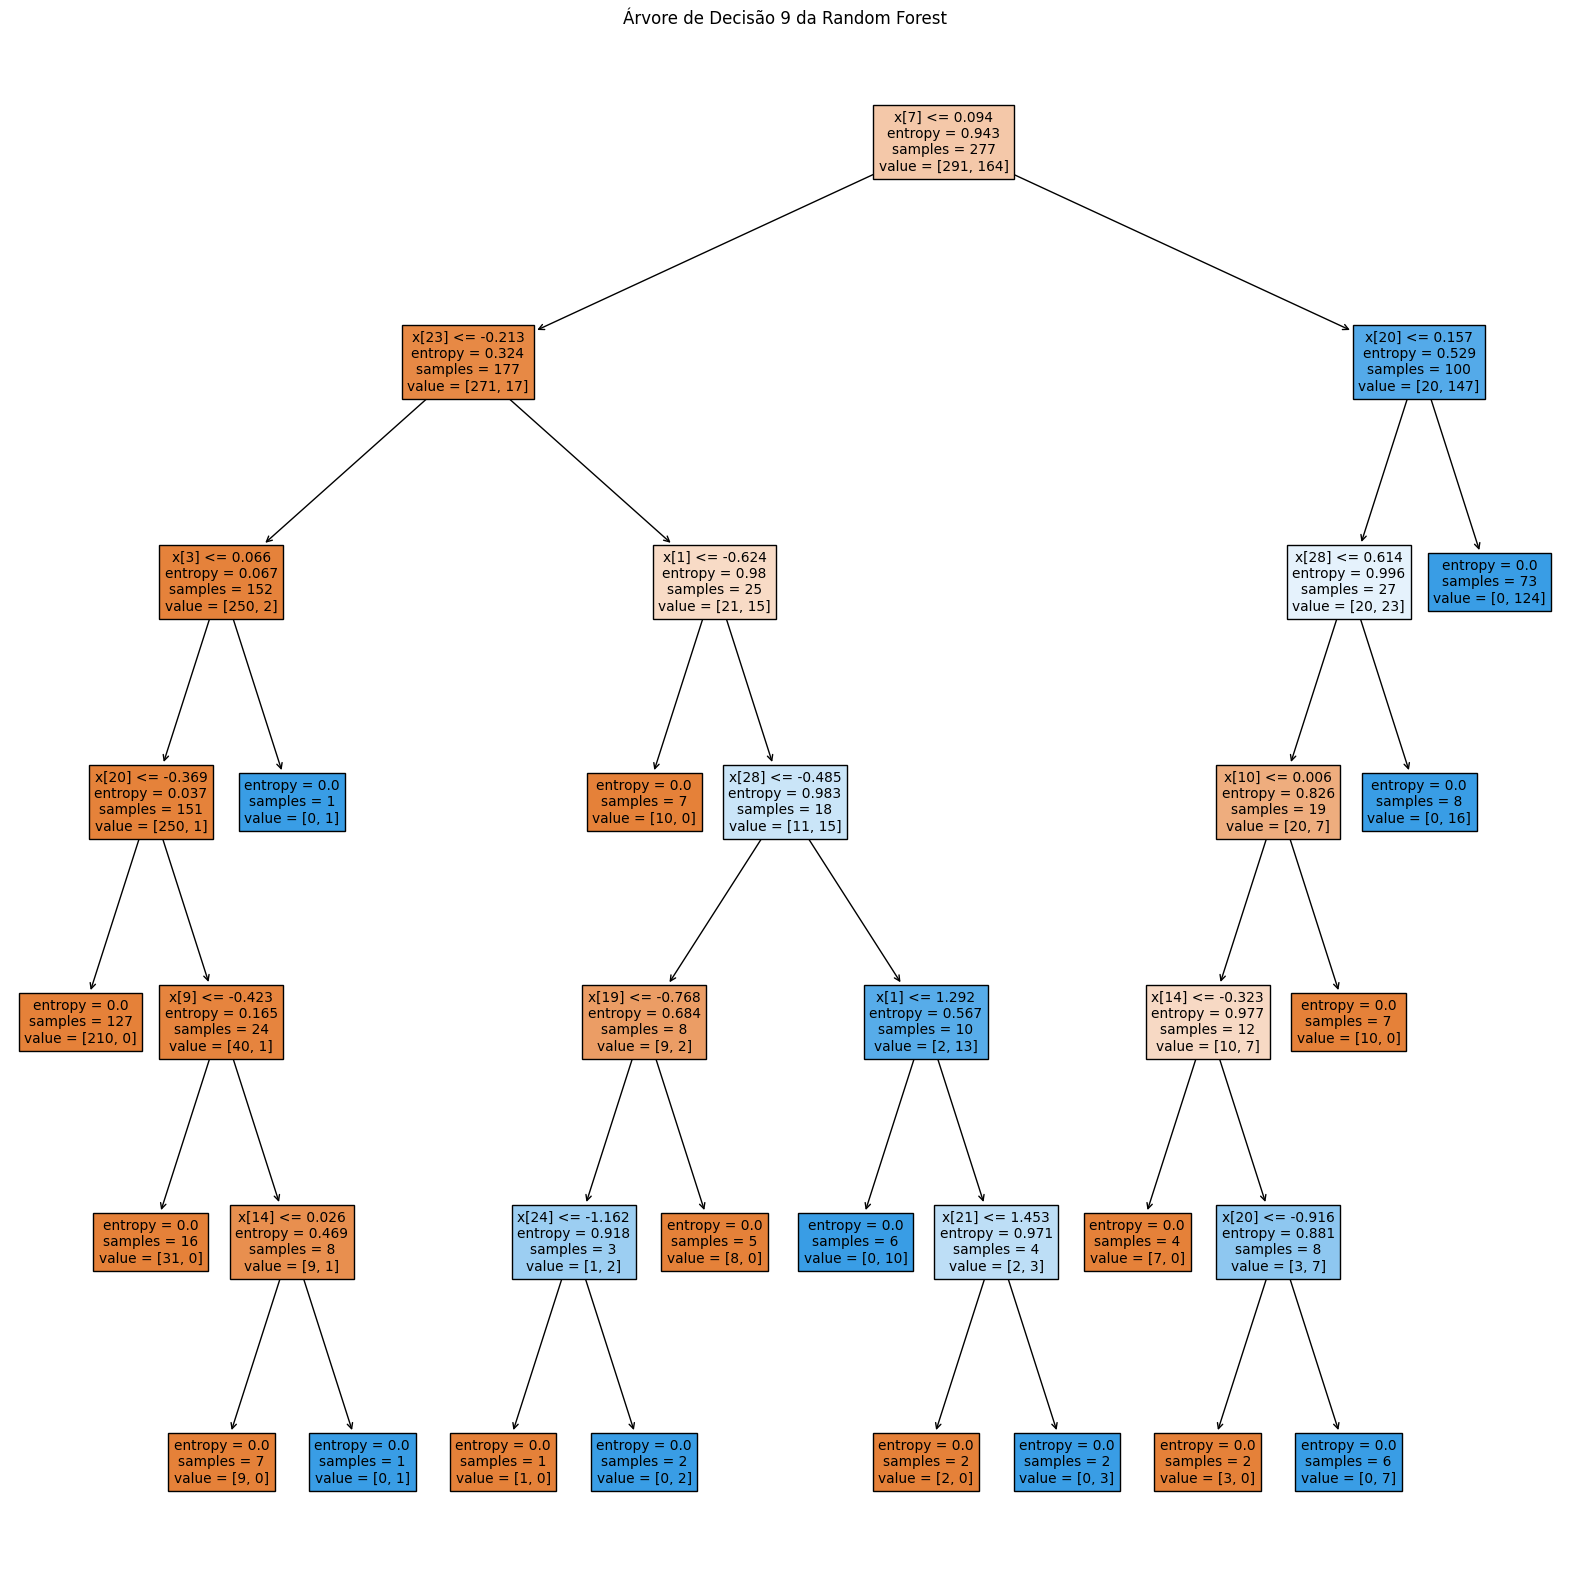

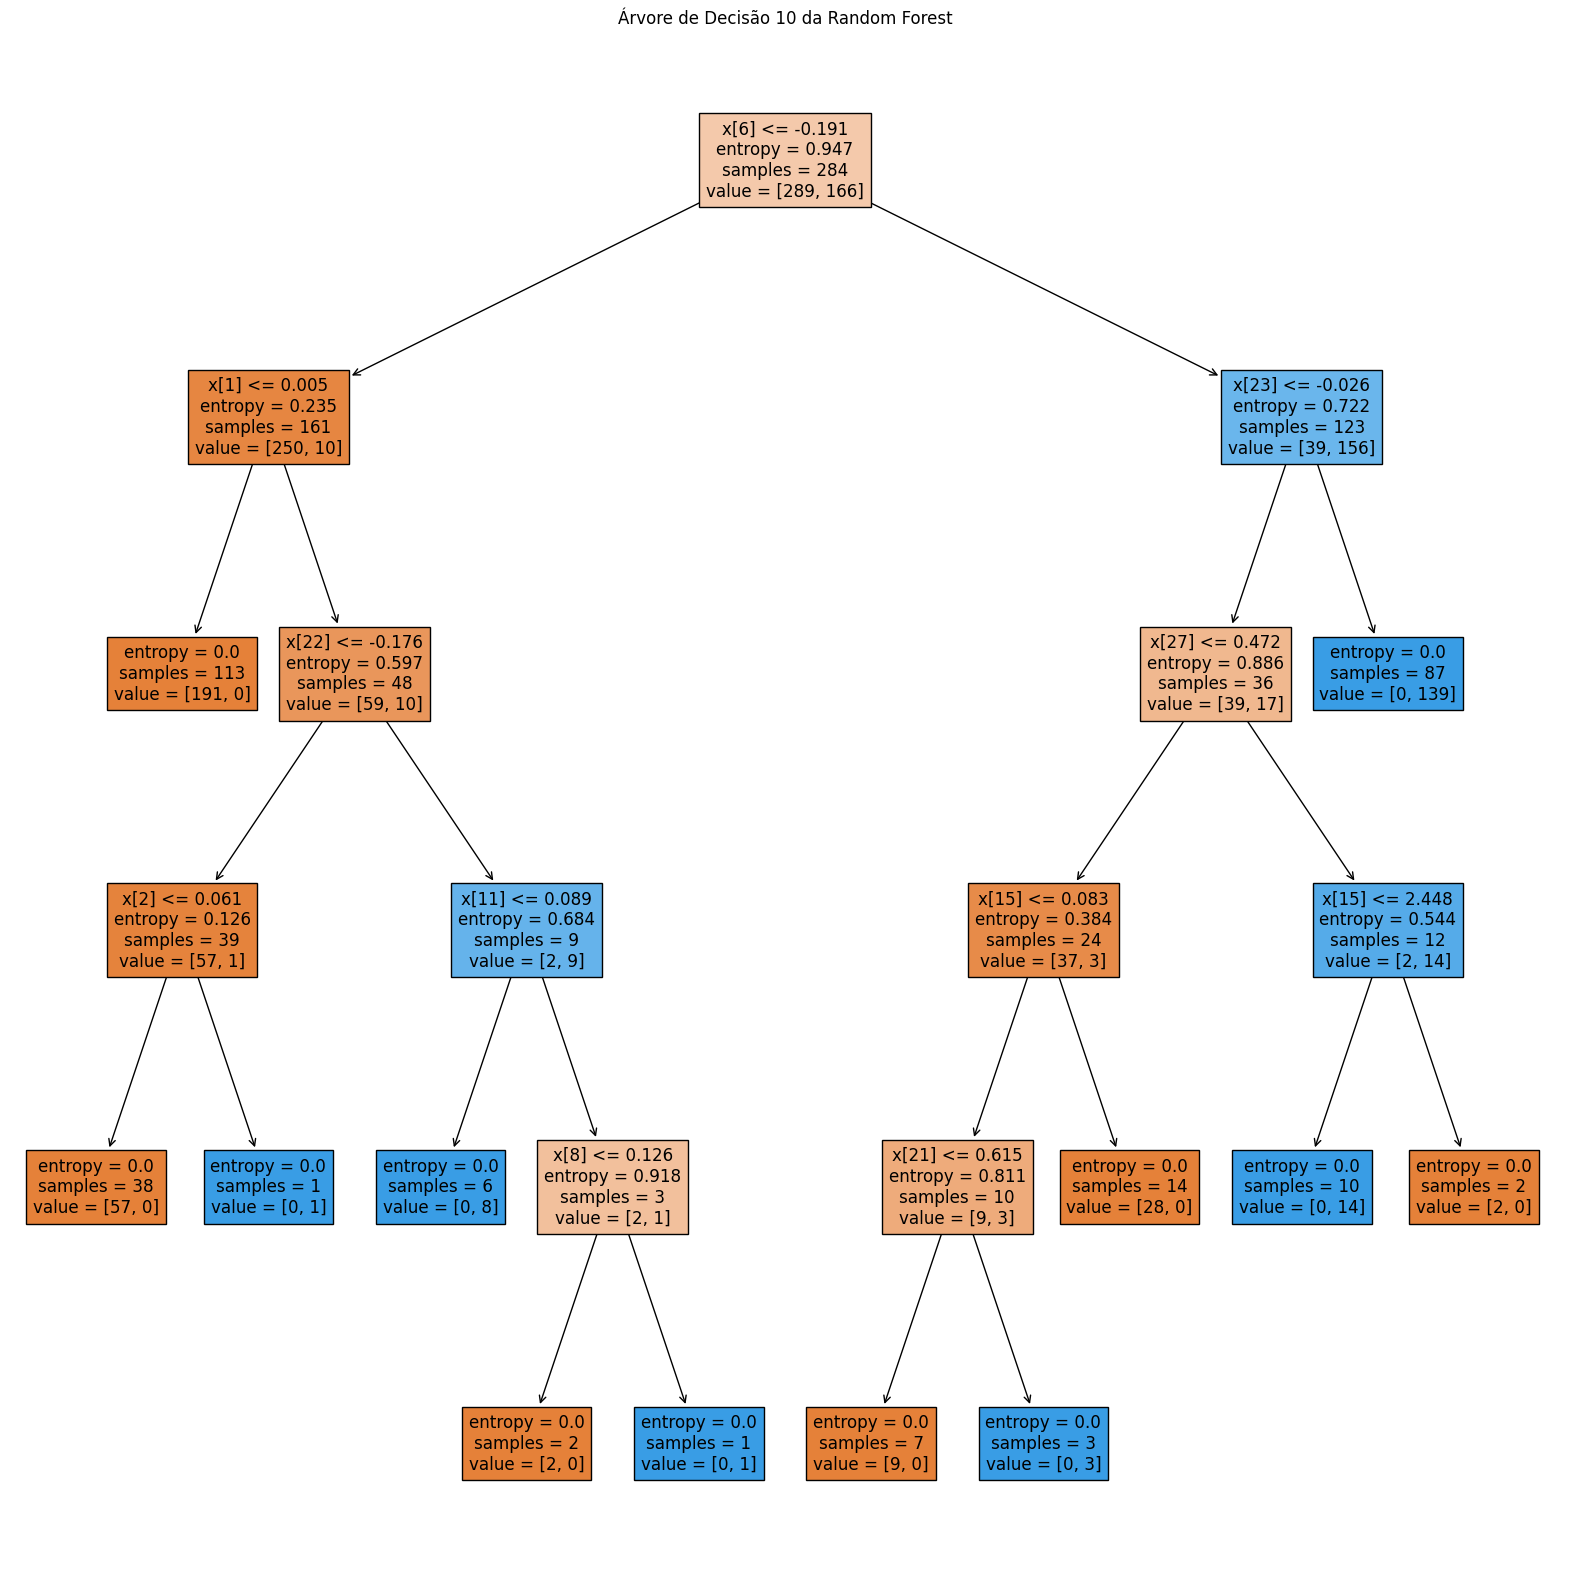

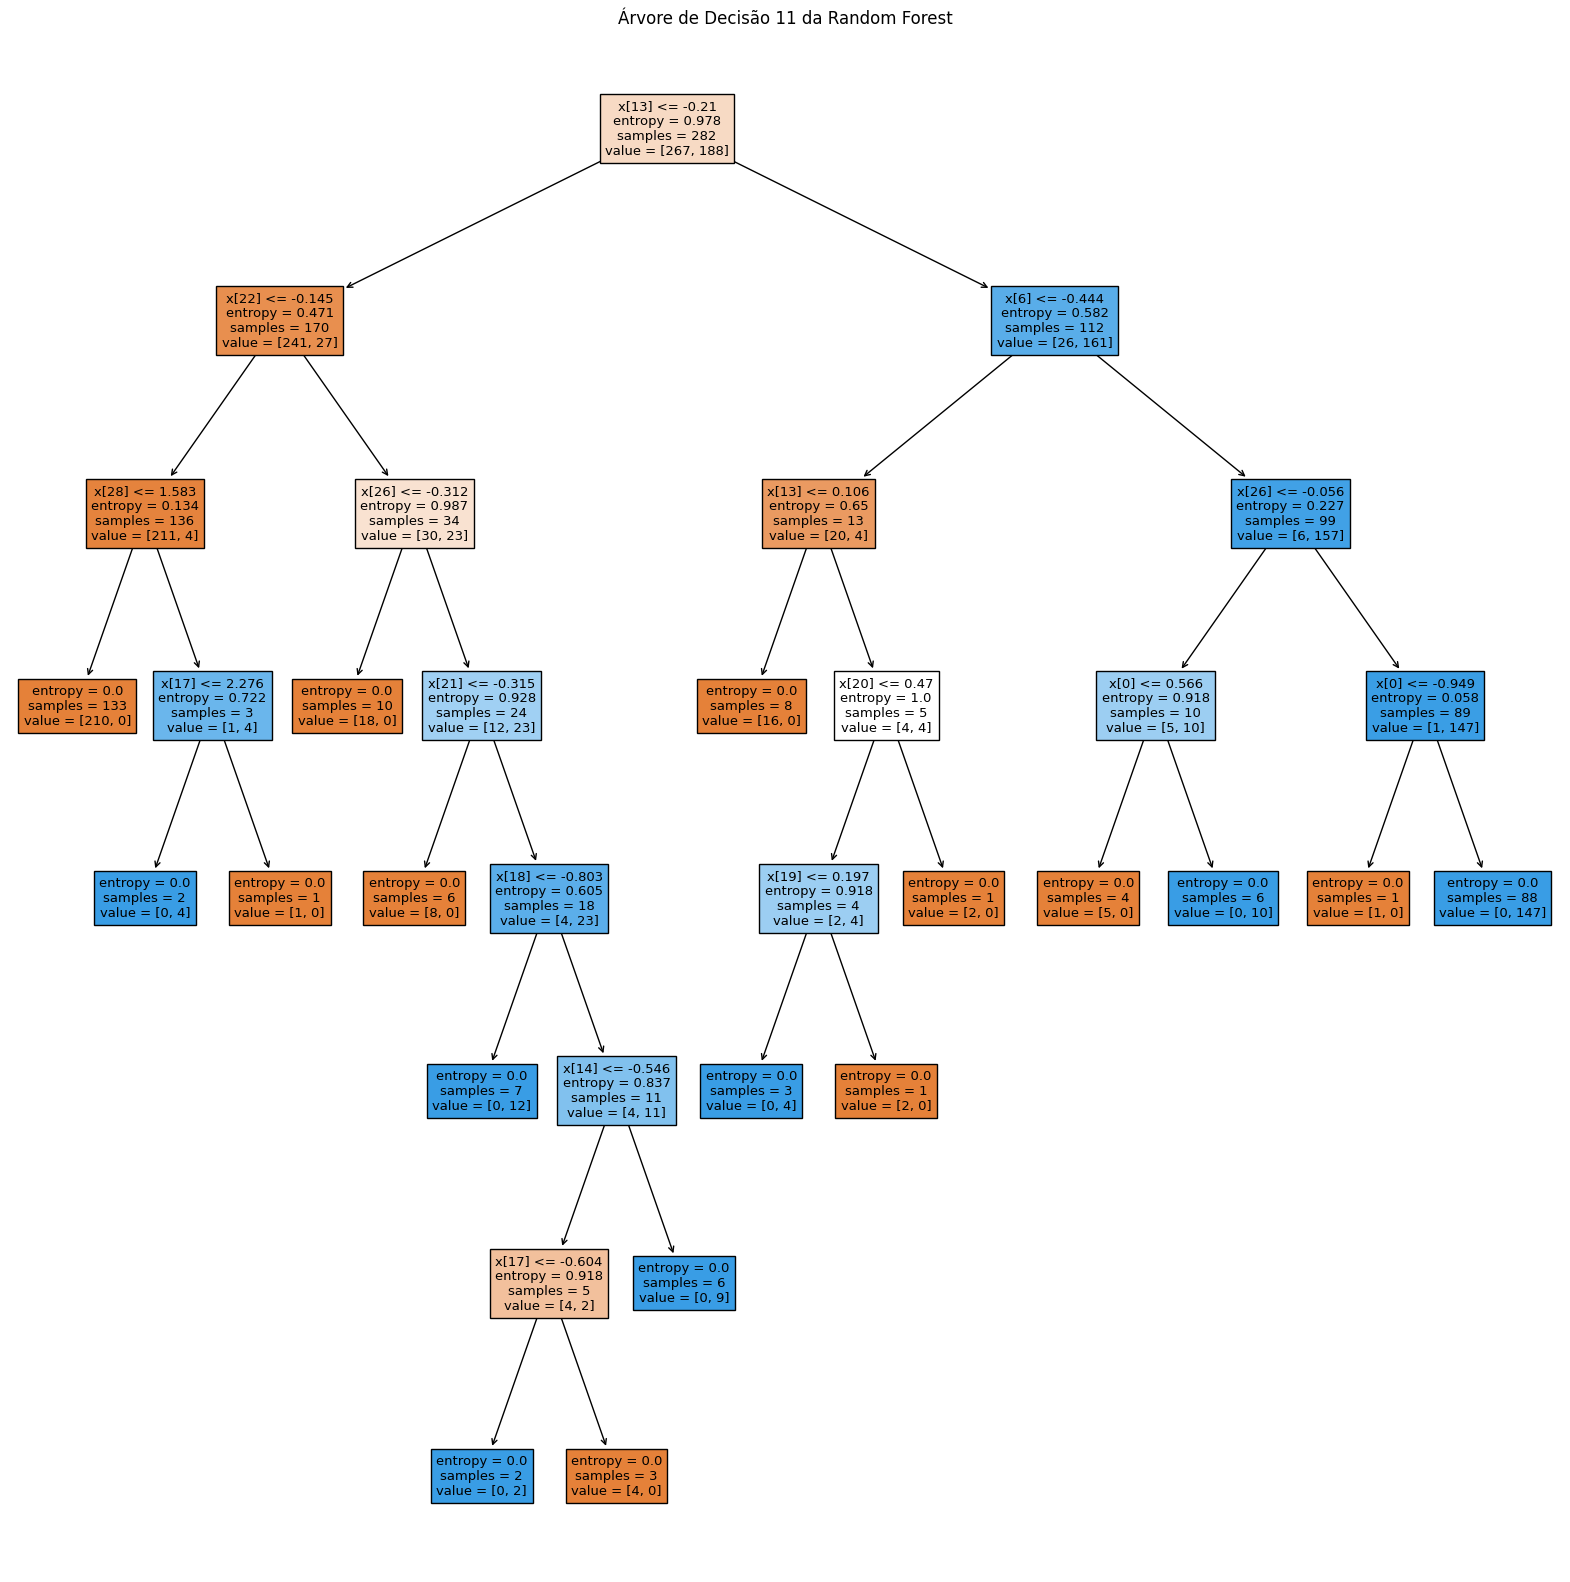

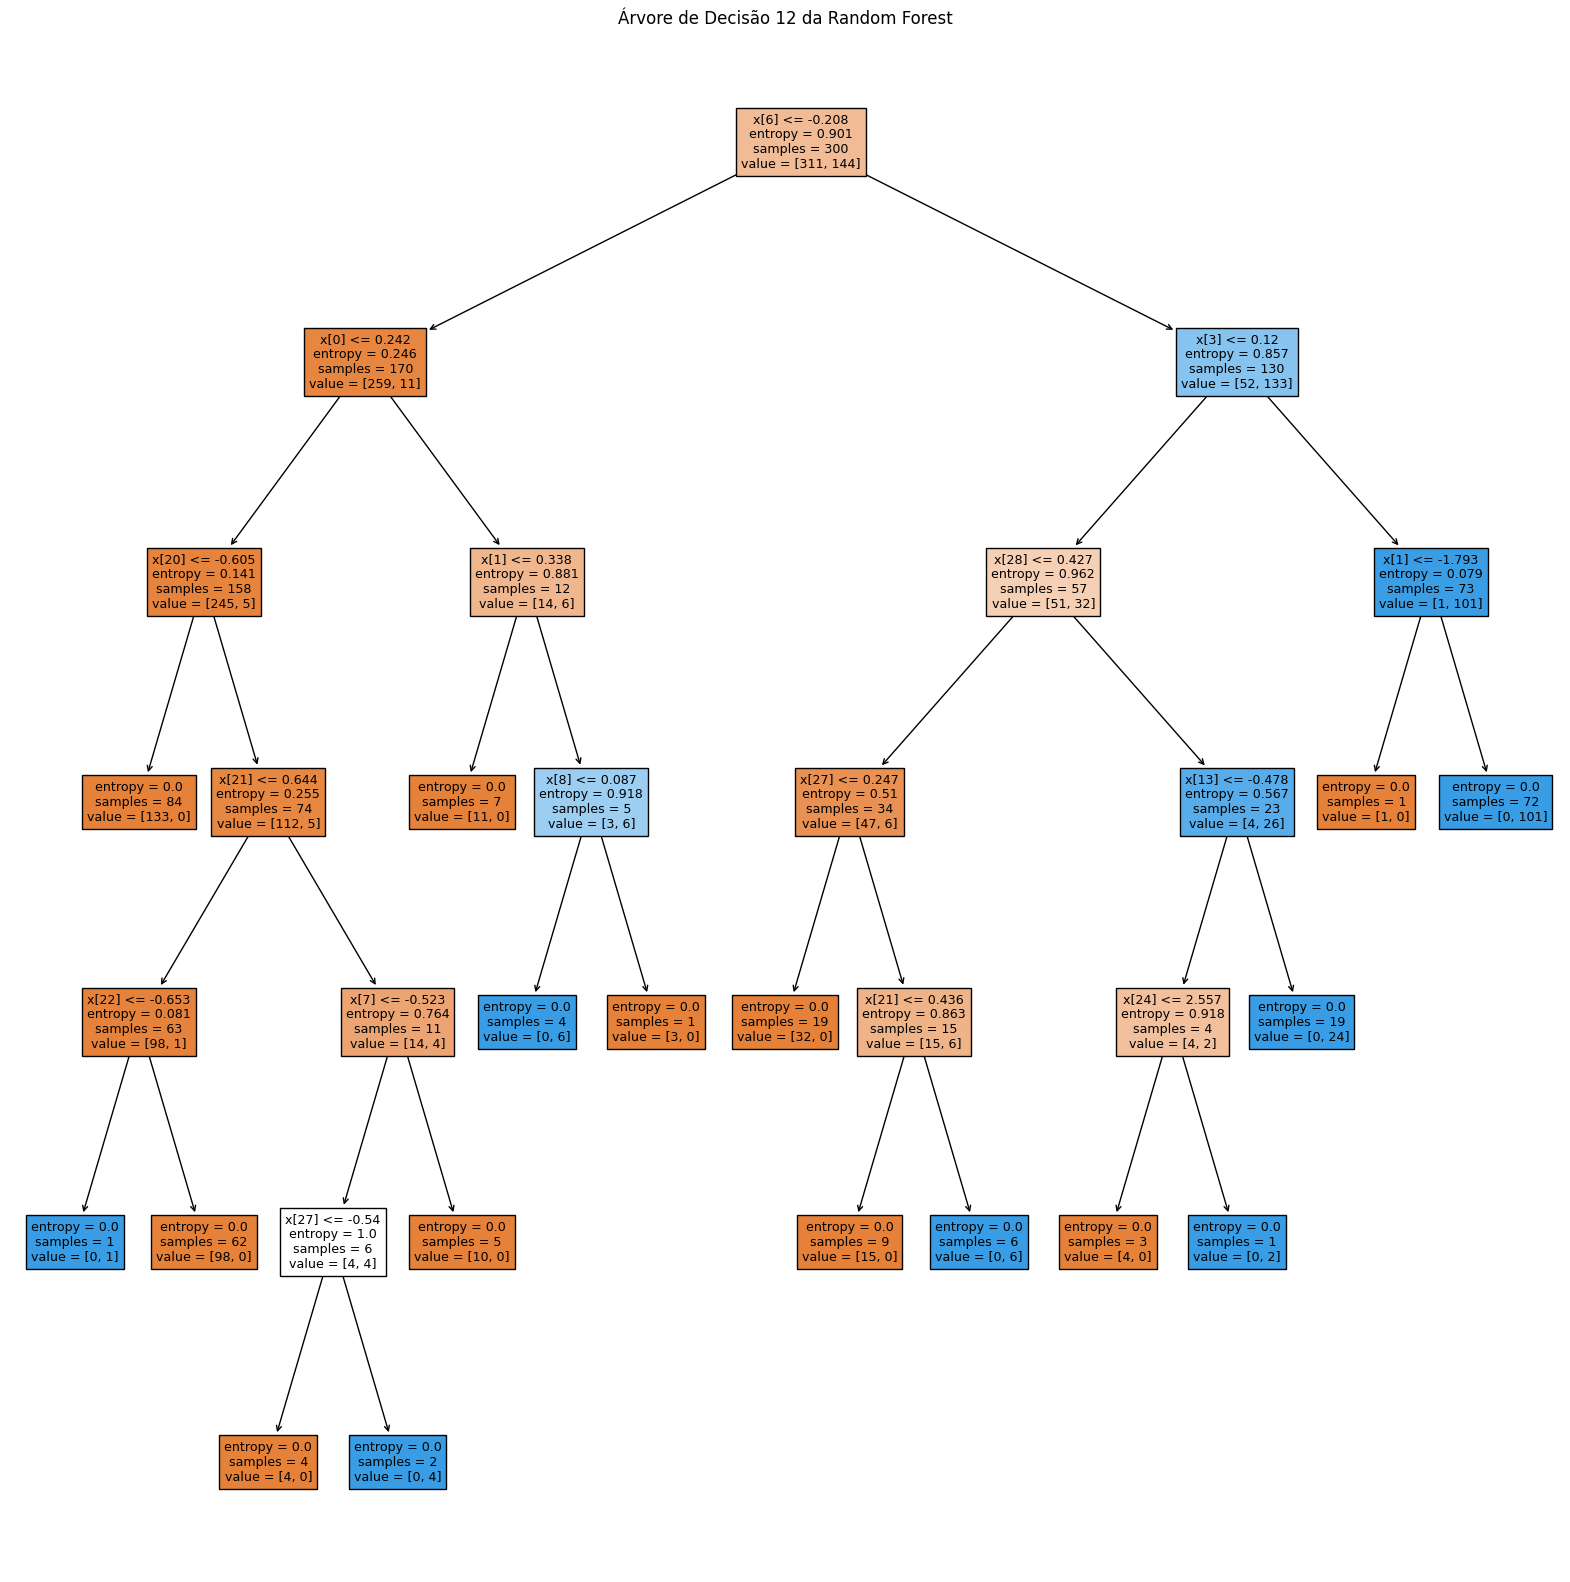

In [253]:
rf = best[0][2]
for i, tree in enumerate(rf.estimators_):
    plt.figure(figsize=(20,20))
    plot_tree(tree, filled=True)
    plt.title(f"Árvore de Decisão {i} da Random Forest")
    plt.show()